In [565]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp as ivp
plt.style.use('seaborn-poster')

In [566]:
# h = 0.01  # Step size
# x = np.arange(0, 1+h, h)  # Data dari 0 sampai 1 + h, karena 1 + h tidak akan dianggap maka sampai 1 saja dengan step h
# y_real = ( (3*(math.e**(2*x))) - 1 ) / 2
# for i in range(len(x)):
#     print(f"f({x[i]}) = {y_real[i]}")

In [567]:
# Fungsi ODE
def f(x, y): return 2*y + 1 

In [569]:
# Function untuk mencari nilai y menggunakan euler method.
def euler(f, y):
    for i in range(0, len(x) - 1):
        y[i+1] = y[i] + h*f(x[i], y[i])

In [568]:
# Step atau beda dari setiap titik dari data yang nantinya akan kita cari nilai y nya.
h = 0.05
# Data dari 0 sampai 1 + h, karena 1 + h tidak akan dianggap maka sampai 1 saja dengan step h
x = np.arange(0, 1+h, h)
# Initial Value
y0 = 1  

# Fungsi asli nantinya kita masukkan nilai x maka didapatkan solusi eksak.
y_real = ( (3*(math.e**(2*x))) - 1 ) / 2

# Jadikan nilai awal dari y atau index pertama menjadi 1 karena initial value nya adalah 1
y = np.zeros(len(x))
y[0] = y0

In [570]:
euler(f, y)
print(f"Hasil dari Euler Method dengan step {h}")
print("f(x)     y dari euler        y asli           error")
for i in range(len(x)):
    # Round 2 angka di belakang koma, karena saat 0.60 atau belakangnya 0 akan
    # seperti 0.60000000000000000000000000000001
    print(f"{round(x[i],2)} = {y[i]} {y_real[i]} {abs(y[i] - y_real[i])}")

maxError = max(abs(y - y_real))
print(f"Error terbesarnya adalah {maxError}")
print(f"Hasil Akhir dari euler method dengan step {h} adalah {y[len(x)-1]} dengan error {abs(y[len(x)-1] - y_real[len(x)-1])}")

Hasil dari Euler Method dengan step 0.05
f(x)     y dari euler        y asli           error
0.0 = 1.0 1.0 0.0
0.05 = 1.15 1.1577563771134716 0.0077563771134716575
0.1 = 1.315 1.332104137240255 0.017104137240254946
0.15 = 1.4965 1.5247882113640046 0.028288211364004612
0.2 = 1.6961499999999998 1.7377370464619055 0.0415870464619057
0.25 = 1.915765 1.9730819060501923 0.05731690605019235
0.3 = 2.1573415 2.2331782005857637 0.07583670058576386
0.35 = 2.42307565 2.5206290612057147 0.09755341120571481
0.4 = 2.715383215 2.838311392738701 0.12292817773870102
0.45 = 3.0369215365000004 3.189404666735424 0.15248313023542348
0.5 = 3.3906136901500004 3.577422742688568 0.1868090525385675
0.55 = 3.7796750591650006 4.00624903591965 0.2265739767546493
0.6 = 4.207642565081501 4.480175384104822 0.27253281902332116
0.65 = 4.67840682158965 5.003945001428866 0.3255381798392154
0.7 = 5.196247503748616 5.582799950267011 0.3865524465183956
0.75 = 5.765872254123478 6.222533605507097 0.4566613513836195
0.8 = 6.392

In [571]:
# second degree runge-kutta, dengan parameter method RK23
yrk = ivp(f, [0,1], [y0], method="RK23", t_eval=x).y[0]

print(f"Hasil dari Second Order Runge Kutta dengan step {h}")
print("f(x)     y dari runge kutta        y asli            error")
for i in range(len(x)):
    # Round 2 angka di belakang koma, karena saat 0.60 atau belakangnya 0 akan
    # seperti 0.60000000000000000000000000000001
    print(f"{round(x[i],2)} = {yrk[i]} {y_real[i]} {abs(yrk[i] - y_real[i])}")

maxError = max(abs(y - y_real))
print(f"Error terbesarnya adalah {maxError}")
print(f"Hasil Akhir dari Second Order Runge Kutta dengan step {h} adalah {yrk[len(x)-1]} dengan error {abs(yrk[len(x)-1] - y_real[len(x)-1])}")

Hasil dari Second Order Runge Kutta dengan step 0.05
f(x)     y dari runge kutta        y asli            error
0.0 = 1.0 1.0 0.0
0.05 = 1.1576972953958562 1.1577563771134716 5.90817176153724e-05
0.1 = 1.3319251027504808 1.332104137240255 0.000179034489774077
0.15 = 1.5245284641302355 1.5247882113640046 0.00025974723376909203
0.2 = 1.7371620725010124 1.7377370464619055 0.0005749739608931215
0.25 = 1.9722029876535236 1.9730819060501923 0.0008789183966686487
0.3 = 2.2321054502975435 2.2331782005857637 0.0010727502882201811
0.35 = 2.519017784526936 2.5206290612057147 0.0016112766787785837
0.4 = 2.8361575716514276 2.838311392738701 0.0021538210872735775
0.45 = 3.186891933363471 3.189404666735424 0.002512733371952791
0.5 = 3.5740619460413816 3.577422742688568 0.0033607966471862483
0.55 = 4.001954822898542 4.00624903591965 0.004294213021108106
0.6 = 4.475241640973019 4.480175384104822 0.004933743131802615
0.65 = 4.997757662493881 5.003945001428866 0.0061873389349846875
0.7 = 5.57506768191585

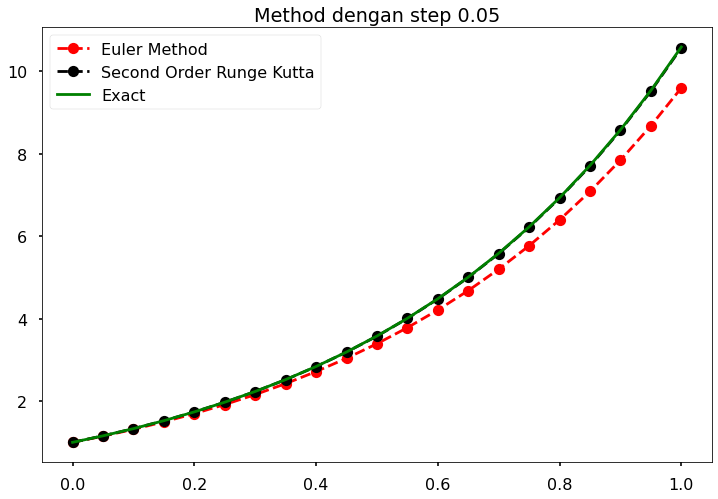

In [572]:
plt.figure(figsize=(12, 8))
plt.title(f"Method dengan step {h}")
plt.plot(x, y, "ro--", label="Euler Method")
plt.plot(x,yrk, "ko--", label="Second Order Runge Kutta")
plt.plot(x, y_real, "g", label="Exact")
plt.legend()
plt.show()

In [573]:
print(f"Relative Error saat step {h}")
for i in range(len(x)):
    relativeErrorEuler = abs(y[i] - y_real[i]) / y_real[i]
    relativeErrorRK2 = abs(y[i] - yrk[i]) / y_real[i]
    # Round 2 angka di belakang koma, karena saat 0.60 atau belakangnya 0 akan
    # seperti 0.60000000000000000000000000000001
    print(f"Saat x = {round(x[i],2)}")
    print(f"Relative Error Euler = {relativeErrorEuler}")
    print(f"Relative Error Runge Kutta Second Order = {relativeErrorRK2}")

Relative Error saat step 0.05
Saat x = 0.0
Relative Error Euler = 0.0
Relative Error Runge Kutta Second Order = 0.0
Saat x = 0.05
Relative Error Euler = 0.0066994898640160595
Relative Error Runge Kutta Second Order = 0.006648458646409921
Saat x = 0.1
Relative Error Euler = 0.012839940033284416
Relative Error Runge Kutta Second Order = 0.012705540263199634
Saat x = 0.15
Relative Error Euler = 0.01855222328791439
Relative Error Runge Kutta Second Order = 0.01838187357519151
Saat x = 0.2
Relative Error Euler = 0.02393172577322812
Relative Error Runge Kutta Second Order = 0.0236008506491328
Saat x = 0.25
Relative Error Euler = 0.02904943067717448
Relative Error Runge Kutta Second Order = 0.028603976084552875
Saat x = 0.3
Relative Error Euler = 0.0339590904863176
Relative Error Runge Kutta Second Order = 0.03347872116875091
Saat x = 0.35
Relative Error Euler = 0.03870201002881845
Relative Error Runge Kutta Second Order = 0.03806277409221148
Saat x = 0.4
Relative Error Euler = 0.043310321077